# COMP0164: Digital Finance
## Group Coursework

If you have set up an **`Anaconda`** environment, don't forget to activate it using:

> conda activate digital_finance_env

Below are the imports that you will need for the coursework:

In [2]:
import numpy as np
import pandas as pd
import numpy_financial as npf
from scipy import stats
import datetime

import yfinance as yf
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

import matplotlib.pyplot as plt
%matplotlib inline

<div class="alert alert-danger">
<b>WARNING: </b>

For question 5, you may want to use **pypfopt** package to construct the efficient frontier. If you use Python>=3.6, the plotting functionality of the **pypfopt** package may not work. Please use the function defined below to plot EfficientFrontier object.
</div>

In [3]:
import copy

def plot_efficient_frontier(ef: EfficientFrontier, points: int=100) -> None:
    fig, ax = plt.subplots()

    # Generate range of returns
    ef_minvol = copy.deepcopy(ef)
    ef_maxret = copy.deepcopy(ef)
    ef_minvol.min_volatility()
    min_ret = ef_minvol.portfolio_performance()[0]
    max_ret = ef_maxret._max_return()
    ef_param_range = np.linspace(min_ret, max_ret - 0.0001, points)

    # Plot efficient frontier from EfficientFrontier object
    mus, sigmas = [], []
    for param_value in ef_param_range:
        ef_i = copy.deepcopy(ef)
        try:
            ef_i.efficient_return(param_value)
        except:
            raise ValueError("pypfopt experiences problems with portfolio optimization.")
        ret, sigma, _ = ef_i.portfolio_performance()
        mus.append(ret)
        sigmas.append(sigma)
    
    # Generate axis and plot
    ax.plot(sigmas, mus, label="Efficient Frontier")
    ax.legend()
    ax.set_xlabel("Volatility")
    ax.set_ylabel("Return")
    plt.show()

## To-Do List

- [ ] Read Coursework Instructions
- [ ] Read Scenario Setting
- [ ] Question 1
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
- [ ] Question 2
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
- [ ] Question 3
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
  - [ ] Part h.)
  - [ ] Part i.)
- [ ] Question 4
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
- [ ] Question 5
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
- [ ] Question 6
  - [ ] Part a.)
  - [ ] Part b.)

## Scenario Setting
Conglomerates are companies that hold assets including other companies and involve themselves directly into the operations of their subsidiaries. Therefore, it is common for conglomerates to evaluate the business projects of their holdings to understand the returns of these projects.

Suppose that you are an executive director working for a conglomerate called Accretion and your job is to assist various operations of the subsidiaries that exist under Accretion, and then report back to the stakeholders.

## Question 1 [16 marks]

You areasked to evaluate businesses and investment ideas on behalf of Accretion as part of their portfolio reshuffling.

Boogle is one of the conglomerate's largest holdings. During the latest earnings report, Boogle's CFO announced an investment of \$150 million for a new business expansion project. The project is planned to be financed with an \$100 million public offering of a 10-year debt and the remainder with an equity offering. You have collected the information necessary to evaluate this project in Exhibits 1 and 2.

### Exhibit 1: Relevant Information for Analysis
| | |
| --- | --- |
| Equity risk premium | 4.93% |
| Risk-free rate of interest | 4.3% |
| Market value of Boogle's debt | \$1.0 billion |
| Market value of Boogle's equity | \$2.6 billion |
| Boogle's equity beta | 1.3 |
| Boogle's before-tax cost of debt | 9.4% |
| Corporate tax rate | 37.5% |


### Exhibit 2: Estimated Project Financials
|     | Year 1 | Year 2 | Year 3 |
| --- | --- | --- | --- |
| Revenue | 96.7 | 111.2 | 115.44 |
| Operating Costs | 32  | 36  | 38  |
| Depreciation | 16  | 16  | 16  |

1 a.) Calculate the weighted average cost of capital of Boogle prior to its new project investment. **\[3 marks\]**

In [ ]:
# Solution

1 b.) Find Boogle's asset beta prior to the new project. **\[2 marks\]**

In [ ]:
# Solution

1 c.) Assuming the new project has the same asset beta as the Boogle company in b.), find the the project equity beta. **\[2 marks\]**

In [ ]:
# Solution

1 d.) The formula for project after-tax free cash flow at time t is

$$ FCF = (\text{Revenue}-\text{Operating Costs}-\text{Depreciation})\times(1-\text{Tax Rate})+\text{Depreciation}.$$

Define a Python function to calculate the project FCFs and demonstrate that the after-tax free cash flow generated for the next three years are $46.4 million, $53 million, and $54.4 million respectively. **\[2 marks\]**

In [ ]:
# Solution

1 e.) Find the project NPV and IRR with the next three years after-tax free cash flow given in d.).**\[2 marks\]**

In [ ]:
# Solution

You also aim to add dividend-paying stock to the conglomerate's portfolio of holdings. You begin by reviewing the following candidates:

### Candidate 1:
Atat Steel is in the steel manufacturing sector with a required rate of return of 7.35%. You estimate that if the economy is booming, the company’s current annual dividend of $0.7 per share will grow 11.5% a year for the next four years and then stabilize at a 3.5% growth rate a year indefinitely. However, if the economy falls into a recession, then Atat Steel will not likely experience the elevated 11.5% short-run growth and instead will grow by 3.5% indefinitely.

### Candidate 2:
GT&T company is a mature company with a stable capital structure. The company had an EPS of $2 in 2023. The earnings in the next year without the additional planned investments are expected to remain at $2. The earnings retention ratio is 0.60. The company is expected to earn an ROE of 15% on its investments, and the required rate of return is 12%. Assume that all dividends are paid at the end of the year.

1 f.) Use the discount dividend method and find the current value of Atat Steel stock under both economic conditions. **\[3 marks\]**

In [ ]:
# Solution

1 g.) Calculate GT&T's sustainable growth rate, find the value of the company's stock at the beginning of 2024 and determine the company's present value of growth opportunities. **\[2 marks\]**

In [ ]:
# Solution

## Question 2 \[15 marks\]
One of the businesses owned by Accretion, Nautilus is a machine tool manufacturer and system integrator, specialising in precision hydraulics for large-scale industrial applications.

Nautilus currently has several ground-breaking patents, on the stabilisation of structural columns for large-scale industrial developments in difficult soil conditions. This is planned to revolutionise the industry and be a massive boom for the future of Nautilus. The bond market has not reacted to this reveal of information for a whole year. With a new windfall from a successful year, Nautilus plans to repurchase some bonds it has already issued onto the market, thus you’re tasked to evaluate these issued bonds.

### Exhibit 3: Current Par Yield and Spot Rates
| Maturity | Par Rate (Annual Coupon) | Spot Rate (Annual Coupon) |
| --- | --- | --- |
| 1 year | 2.50% | 2.50% |
| 2 years | 2.99% | 3.00% |
| 3 years | 3.48% | 3.50% |
| 4 years | 3.95% | 4.00% |
| 5 years | 4.37% | ? |

### Exhibit 4: Information for Selected Bonds
| Bond Name | Maturity | Coupon | Type of Bond |
| --- | --- | --- | --- |
| Bond A (Face value $1,000) | 3 years | 6.40% annual | Option-free |
| Bond B | 3 years | 4.30% annual | Callable at par on start of year 1 and tear 2 |
| Bond C | 3 years | 4.30% annual | Putable at par on start of year 1 and year 2 |

### Exhibit 5: Binomial Interest Rate Tree, based on an estimated interest rate volatility of 10%, where ‘u’ represents an up move and ‘d’ represents a down move.
| Year 0 | Year 1 | Year 2 |
| --- | --- | --- |
| 2.2500% (r) | 3.5930% (ru node) | 4.6470% (ruu node) |
|  | 2.9417% (rd node) | 3.8046% (rud node) |
|  |  | 3.1150% (rdd node) |

2 a.) Based on Exhibit 3, find the five-year spot rate. **\[2 marks\]**

In [ ]:
# Solution

2 b.) Assuming the law of one price, use Exhibit 3 to calculate the forward rate of a one-year loan starting in three years. **\[1 mark\]**

In [ ]:
# Solution

2 c.) Given spot rates for one-, two-, and three-year zero bonds, how many forward rates can be calculated? Please list the forward rates that can be calculated and briefly explain your answer. **\[3 marks\]**

In [ ]:
# Solution

2 d.) Find the yield to maturity for Bond A. You can use the IRR function from NumPy Financial. **\[3 marks\]**

In [ ]:
# Solution

2 e.) Based on Exhibit 5, assume an equal probability of interest rate going up and down at each node. Calculate the value of Bond B and Bond C with the binomial tree model. **\[3 marks\]**

In [ ]:
# Solution

2 f.) All else being equal, explain the effect of a fall in interest rates on Bond B and Bond C. **\[2 marks\]**

In [ ]:
# Solution

2 g.) All else being equal, which bond is most likely to increase in value if interest rate volatility is 15% rather than 10%? Briefly explain your answer. (Hint: consider the value of options) **\[1 mark\]**

In [ ]:
# Solution

## Question 3 \[19 marks\]
Uiop, manages the money generated in the conglomerate. As part of your role to be in the know of the many operational parts of Accretion, you’ve been rotated to the strategic options desk within Uiop, and you’ve been asked to refresh your knowledge on derivatives and their pricing, by answering these questions.

Consider a stock that is trading at $100 today. The stock does not generate income/pay dividends. The stock is traded in a well-functioning market with no transaction costs and no restrictions on short sales. Both borrowing and lending can be done in unlimited amounts at the 2% risk-free rate.

3 a.) What is the difference between forward contracts and futures contracts (Answers should be no longer than 200 words) **\[4 marks\]**

In [ ]:
# Solution

3 b.) Consider a futures contract on the stock with a maturity of one year. Suppose that the futures price is currently at $110. Are the futures fairly priced? Describe an arbitrage strategy that would allow you to make a riskless profit. **\[2 marks\]**

In [ ]:
# Solution

3 c.) Same as question b) but suppose that the futures price is currently at $95. Describe your arbitrage strategy. **\[2 marks\]**

In [ ]:
# Solution

Suppose that you hold a long position on a European call option that has an underlying asset price of $57.03, strike price of $55, risk-free rate of 0.22%, 32% volatility, and time-to-expiration of 0.25. The underlying asset does not have any investment yield.

3 d.) Value this call option. **\[1 mark\]**

In [ ]:
# Solution

3 e.) Based on the Black-Scholes-Merton model, describe a portfolio that replicates the call option’s payoff. **\[1 mark\]**

In [ ]:
# Solution

3 f.) Define a function to price the option with the binomial tree method. The function should take the number of steps (n) as one of the inputs. You should NOT use list comprehension in the function. **\[3 marks\]**

In [ ]:
# Solution

3 g.) By setting n = 10, 50 and 100, compare and comment on the results under the two methods. **\[2 marks\]**

In [ ]:
# Solution

When buying two calls with the exercises price of $x_{1}$ and $x_{3}$ and selling two calls with the exercise price of $x_{2}$, where
$$x_{2} = \frac{x_{1}+x_{3}}{2},$$
with the same maturity for the same stock, we call it a butterfly. Consider the following call options for the stock that trades at $57.03:
| Option Name | Strike Price | Call Premium (Price) |
| --- | --- | --- |
| Call Option 1 | 50 | 10 |
| Call Option 2 | 55 | 7 |
| Call Option 3 | 60 | 5 |

3 h.) Create a graphical representation of the butterfly strategy’s payoff. **\[2 marks\]**

In [ ]:
# Solution

3 i.) Why might an investor enter into such a strategy? **\[2 marks\]**

In [ ]:
# Solution

## Question 4 \[13 marks\]
Suppose that you want to build a portfolio with the stocks (with tickers of) AAPL, GOOG, AMZN and META. You plan to retrieve the relevant Yahoo Finance data with the yfinance Python module from the 1st of Jan. 2017 to 1st of Nov. 2023 (inclusive).

4 a.) Calculate the daily returns of these stocks. You should use the adjusted daily closing price. **\[1 mark\]**

In [16]:
# Solution
import plotly.express as px
#We start by defining the tickers and date ranges
tickers=['AAPL','GOOG', 'AMZN', 'META']
start_date='2017-01-01'
end_date='2017-11-1'

#Then we fetch the data from yfinance for the adjusted daily closing price
data=yf.download(tickers, start=start_date, end=end_date)

# Ensure the data are sorted by Date
data = data.sort_values(by='Date')

#Calculating daily returns and dropping NA values
daily_returns= data['Adj Close'].pct_change().dropna()

#Check by viewing the first rows
print(daily_returns.head())

# Loop through each ticker and plot its daily returns
for ticker in tickers:
    fig = px.line(daily_returns, x=daily_returns.index, y=ticker, 
                  title=f"Daily Returns of {ticker}")
    fig.show()


[*********************100%%**********************]  4 of 4 completed
                AAPL      AMZN      GOOG      META
Date                                              
2017-01-04 -0.001119  0.004657  0.000967  0.015660
2017-01-05  0.005085  0.030732  0.009048  0.016682
2017-01-06  0.011148  0.019912  0.015277  0.022707
2017-01-09  0.009159  0.001168  0.000620  0.012074
2017-01-10  0.001008 -0.001280 -0.002306 -0.004404


/Users/MacBookAirSF/anaconda3/envs/digital_finance_env/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/Users/MacBookAirSF/anaconda3/envs/digital_finance_env/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/Users/MacBookAirSF/anaconda3/envs/digital_finance_env/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/Users/MacBookAirSF/anaconda3/envs/digital_finance_env/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



4 b) Based on a.), find the covariance matrix of these stocks. **\[1 mark\]**

In [18]:
# Solution
#Calculating the covariance of these stocks
cov=daily_returns.cov()

#Annualizing the covariance
annualized_cov=cov*252

print("Covariance Matrix")
print(cov)
print("Annualized Covariance")
print(annualized_cov)

Covariance Matrix
          AAPL      AMZN      GOOG      META
AAPL  0.000125  0.000078  0.000054  0.000067
AMZN  0.000078  0.000189  0.000091  0.000095
GOOG  0.000054  0.000091  0.000098  0.000074
META  0.000067  0.000095  0.000074  0.000111
Annualized Covariance
          AAPL      AMZN      GOOG      META
AAPL  0.031625  0.019769  0.013679  0.016948
AMZN  0.019769  0.047667  0.022915  0.023851
GOOG  0.013679  0.022915  0.024766  0.018606
META  0.016948  0.023851  0.018606  0.027942


4 c.) Suppose that the four stocks are equally weighted, find the annualised portfolio expected returns and portfolio variance. **\[2 marks\]**

In [19]:
# Solution
#First we determine the annualized mean returns
annual_mean_returns=daily_returns.mean()*252

#Define the weights of the portfolio (equally weighted at 25%)
weights=[0.25, 0.25, 0.25, 0.25]

#Portfolio expected annual returns
port_expected_return=sum(weights*annual_mean_returns)

#We can annualize the portfolio variance
port_variance= np.dot(weights, np.dot(annualized_cov, weights))

print("Annualized Portfolio Expected Return:", port_expected_return)
print("Annualized Portfolio Variance:", port_variance)

Annualized Portfolio Expected Return: 0.45667511473855804
Annualized Portfolio Variance: 0.022720993493660795


4 d.) Find the efficient portfolio with the maximum Sharpe ratio. What is the corresponding Sharpe ratio? **\[2 marks\]**

In [23]:
# Solution
#Efficient Frontier
ef=EfficientFrontier(annual_mean_returns, annualized_cov)

#Finding optimal portfolio
optimal_weights=ef.max_sharpe()

#Metrics
cleaned_weights=ef.clean_weights()
expected_return, volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)

#Displayng results
print("Optimal Portfolio Weights:", cleaned_weights)
print(f"Expected Annual Return: {expected_return:.4f}")
print(f"Annual Volatility - Standard Deviation: {volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Expected annual return: 51.8%
Annual volatility: 15.3%
Sharpe Ratio: 3.25
Optimal Portfolio Weights: OrderedDict([('AAPL', 0.33235), ('AMZN', 0.0), ('GOOG', 0.0), ('META', 0.66765)])
Expected Annual Return: 0.5183
Annual Volatility - Standard Deviation: 0.1532
Sharpe Ratio: 3.2529


4 e.) Plot the efficient frontier (Without the use of the Plotly library in Python). **\[3 mark\]**

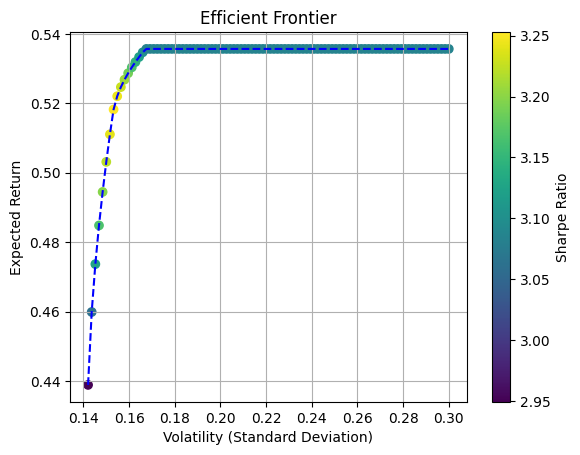

In [30]:
# Solution

# Setting up a range of volatilities
volatility_range = np.linspace(0.142, 0.30, 100)

# Expected returns and Sharpe ratios for given risk
expected_returns = []
sharpe_ratios = []
for v in volatility_range:
    # Create a new instance of EfficientFrontier for each iteration
    ef = EfficientFrontier(annual_mean_returns, annualized_cov)
    ef.efficient_risk(target_volatility=v)
    ret, vol, sharpe = ef.portfolio_performance()
    expected_returns.append(ret)
    sharpe_ratios.append(sharpe)

# Efficient Frontier plot
plt.scatter(volatility_range, expected_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.plot(volatility_range, expected_returns, 'b--')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid()
plt.show()


4 f.) Based on the concept of diversification, comment on the current portfolio. How can this portfolio be improved? (Answers should be no longer than 200 words) **\[4 marks\]**

In [ ]:
# Solution

Diversification refers to the financial concept reducing exposure to risks related to investing only in the same type of asset, whether investing only in industry-specific, location-specific, or class-specific assets.
This portfolio is made of stocks from large technological companies all based in the United-States. This portfolio is therefore exposed to the following risks:
-Industry-related risks: breakthroughs and competition often occur in the technological industry
-Location-related risks: policies and regulations specific to the US could jeopardize the whole portfolio
-Class-related risk: investing only in stocks could expose the portfolio to economic downturns and crisis, considering the investments are not covered by any specific strategies (options, bonds, futures, etc...)

Improving the portoflio with diversification would therefore mitigate these risks. Investing in different sectors, such as housing, healthcare, or agriculture would lower the industry-specific risks. Diversifying the investments in different countries such as China, Europe, or India would be efficient to be protected towards country-specifi economic downturns. Finally, investing in different classes of assets and implementing strategies through diversification would improve profits.

## Question 5 \[14 marks\]
A high-profile client Pam, whom you’ve built a great business relationship with over the years has asked you to quickly double-check some figures for life insurance he has received. You decide to apply the [2015 VBT Unismoke ANB/ALB](http://www.soa.org/files/research/exp-study/2015-vbt-smoker-distinct-alb-anb.xlsx), the Valuation Basic Table (VBT) to using the Age Nearest Birthday (ANB) method, with a valuation interest rate of 5.2% you submit your calculated figures to aid Pam's decision.

Today is 11 November 2023, and the type of life insurance Pam was viewing was permanent life insurance. Pam was born on 25 March 1980, with the health condition standard for her cohort of the same age and gender (Female).

5 a.) Calculate Pam’s annual unconditional survival rates $_{n}p_{x}$ from now to age 54. **\[4 marks\]**

In [44]:
# Solution
from datetime import datetime

# Loading the VBT table
vbt_table = pd.read_excel('2015-vbt-smoker-distinct-alb-anb.xlsx',sheet_name='2015 FNS ANB', header=2, index_col=0)

# Calculating Pam's current age with ANB
today = datetime(2023, 11, 11)
birthday = datetime(1980, 3, 25)
current_age_ANB = today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))

# Correcting the age if today is before her birthday
current_age_ANB += ((today.month, today.day) < (birthday.month, birthday.day))

# Calculate the duration from current age to age 54
duration_to_54 = 54 - current_age_ANB

# Extract mortality rates for Pam's current age to age 54
mortality_rates = vbt_table.loc[current_age_ANB].iloc[:duration_to_54]

# Calculate npx values
npx_values = 1 - mortality_rates / 1000  # Adjusting as rates are per 1000

# Convert the index to represent the ages
npx_values.index = range(current_age_ANB, 54)

print(npx_values)


43    0.99984
44    0.99975
45    0.99965
46    0.99949
47    0.99937
48    0.99929
49    0.99924
50    0.99914
51    0.99900
52    0.99883
53    0.99869
Name: 43, dtype: float64


5 b.) Calculate Pam’s life expectancy in years (to one decimal place). **\[3 marks\]**

In [60]:
# Solution

# Calculating the average number of survivors during each year interval (Lx)
Lx_values = npx_values.shift(-1).fillna(0) + npx_values
Lx_values = Lx_values / 2

# Calculating Tx as the total number of person-years lived beyond each age
Tx_values = Lx_values[::-1].cumsum()[::-1]

# Calculating life expectancy at current age
life_expectancy = Tx_values[current_age_ANB] / npx_values[current_age_ANB]

# Rounding to one decimal place
life_expectancy = round(life_expectancy, 1)

print(f"Pam's life expectancy: {life_expectancy} years")



Pam's life expectancy: 10.5 years


5 c.) Calculate the probability that Pam dies exactly between 6 and 9 years from now (to five decimal places). **\[3 marks\]**

In [61]:
# Solution

# Calculate the probability that Pam survives between +6 years and +9 years
prob_survive_6_years = npx_values.iloc[6] 
prob_survive_9_years = npx_values.iloc[9] 

# Probability of dying between 6 and 9 years from now
probability_dying_between = prob_survive_6_years - prob_survive_9_years

# Output the probability rounded to five decimal places
print(f"Probability of Pam dying between 6 and 9 years from now: {probability_dying_between:.5f}")


Probability of Pam dying between 6 and 9 years from now: 0.00041


5 d.) Calculate the minimum annual premium rate (premium as a fraction of death benefit) that your company should charge for Pam's cohort (to five decimal places). **\[4 marks\]**

In [67]:
# Solution

# Setting the annual discount rate
annual_discount_rate = 0.052

# Calculate qx values (probability of dying within the year)
qx_values = 1 - npx_values

# Calculate px values (probability of surviving the year interval)
px_values = npx_values.shift(-1).fillna(0)

# Calculate the discount factors for each year
discount_factors = [(1 / (1 + annual_discount_rate)) ** t for t in range(1, len(qx_values) + 1)]

# Calculate the expected PV of the death benefits
expected_death_benefits = sum(qx_values * discount_factors)

# Calculate the expected PV of the premiums assuming premiums are paid until death or end of term
premium_payment_years = np.minimum(np.arange(1, len(px_values) + 1), 54 - current_age_ANB)
expected_premiums = sum(discount_factors[:len(premium_payment_years)])

# Calculate the minimum annual premium rate
annual_premium_rate = expected_death_benefits / expected_premiums

# Output of the annual premium rate rounded to five decimal places
annual_premium_rate = round(annual_premium_rate, 5)

print(f"Minimum annual premium rate: {annual_premium_rate}")



Minimum annual premium rate: 0.00065


## Question 6 \[8 marks\]
The conglomerate you are working for, Accretion, decided to digitalize the financial analysis in order to optimize their operations. Since you have expertise in a multitude of financial instruments, you have been tasked to perform the innovation.

Firstly, you are asked to design a tool for computing the zero spot rates using the bootstrap method, and then verify its validity by applying it to Exhibit 6 below.

### Exhibit 6: Spot Rate Table
| Principal | Maturity (Years) | Coupon (per Year) | Price | Coupon Frequency | Zero Rate (Continuous) |
| --- | --- | --- | --- | --- | --- |
| 100 | 0.5 | 0 | 99.8 | 0.5 (SA) | 0.4% |
| 100 | 1 | 4 | 101.2 | 1 (A) | 2.729% |
| 100 | 1.5 | 5 | 102.4 | 0.5 (SA) | 3.353% |

- SA: Semi-annual coupon
- A: Annual coupon

6 a.) Design a function that take in the required parameters for the bootstrap method in form of a Pandas DataFrame and returns the same DataFrame but with a new column called "Zero Rates". Then, check that your function gives the correct spot rates in the table above. **\[4 mark\]**

In [75]:

# Define the DataFrame according to the given values
spot_rate_df = pd.DataFrame([[100, 0.5, 0, 99.8, 0.5], [100, 1, 4, 101.2, 1], [100, 1.5, 5, 102.4, 0.5]],
                            columns=["Principal", "Maturity", "Coupon", "Price", "Coupon Frequency"])

def bootstrap_method(df: pd.DataFrame) -> pd.DataFrame:
    zero_rates = []

    for i, row in df.iterrows():
        principal, maturity, coupon, price, freq = row
        freq = 2 if freq == 0.5 else 1  # Convert frequency to either 1 (annual) or 2 (semi-annual)
        
        # Calculate total periods and coupon payment per period
        total_periods = int(maturity * freq)
        coupon_payment = (coupon / freq) * principal

        # Generate cash flows for the bond
        cash_flows = np.full(total_periods, coupon_payment)
        cash_flows[-1] += principal  # Add principal to the last payment

        # Initialize a variable to store the present value of cash flows
        pv = 0

        # Discount earlier cash flows using already calculated zero rates
        for j in range(1, total_periods):
            for k, earlier_maturity_val in enumerate(df['Maturity'].iloc[:i]):
                if j / freq <= earlier_maturity_val:
                    earlier_rate = zero_rates[k] / 100
                    pv += cash_flows[j-1] / ((1 + earlier_rate / freq) ** j)

        # Calculate the zero rate for the bond
        remaining_cash_flow = cash_flows[-1]
        remaining_time = total_periods / freq
        zero_rate = (npf.irr(-np.append([-price + pv], [remaining_cash_flow])) + 1) ** freq - 1
        zero_rates.append(zero_rate * 100)  # Convert to percentage

    df['Zero Rates'] = zero_rates
    return df


# Test the function with the given table values
bootstrap_method(df=spot_rate_df)



,Principal,Maturity,Coupon,Price,Coupon Frequency,Zero Rates
0,100,0.5,0,99.8,0.5,0.401203
1,100,1.0,4,101.2,1.0,394.071146
2,100,1.5,5,102.4,0.5,NaN


It is often that in real world investors encounter friction costs such as fees, commissions and other types of expenses. Currently, NPV is used to measure ther value of an investment opportunity:

$$NPV = C_{0} + PV.$$

Your task is to design a tool for evaluating net value of a bond, which takes into consideration accrued interest, commission fees on entrance and exit (assume there is commission for settling the return of the principal), and administrative fees, which are monthly fees associated with the exchange that keeps track of asset ownership.

6 b.) Define a python function for calculating the net value of a bond subject to accrued interest, entry and exit fees and administrative fees (assume the administrative fees are paid out at the same frequency as the coupons). The accrued interest MUST be computed from the coupon value. **\[3 marks\]**

In [72]:
def improved_npv(principal: float, coupon: float, price: float, interest_rate: float, 
                 n_periods: int, administrative_fee: float, entry_fee: float,
                 exit_fee: float, days_from_last_coupon: int, 
                 coupon_frequency_per_year: int) -> float:
    
    # Calculate the coupon payment per period
    coupon_payment = principal * (coupon / coupon_frequency_per_year)

    # Calculate accrued interest
    days_per_period = 365 / coupon_frequency_per_year
    accrued_interest = coupon_payment * (days_from_last_coupon / days_per_period)

    # Adjust initial price for entry fee and accrued interest
    adjusted_price = price + entry_fee + accrued_interest

    # Generate cash flows
    cash_flows = [-adjusted_price]
    for i in range(1, n_periods + 1):
        net_cash_flow = coupon_payment - administrative_fee
        if i == n_periods:
            net_cash_flow += principal - exit_fee  # Include principal repayment and exit fee at maturity
        cash_flows.append(net_cash_flow)

    # Calculate NPV
    npv = npf.npv(interest_rate / coupon_frequency_per_year, cash_flows)

    return npv

6 c.) Using the values from Exhibit 7 compute the net value of the investment. Is this a good investment considering all the expenses? **\[1 mark\]**

### Exhibit 7: Information for an Investment
| Parameter | Value |
| --- | --- |
| Principal | $100 |
| Coupon | $4 (Yearly) |
| Price | $101.5 |
| Interest Rate | 2% |
| Maturity | 3 years |
| Administrative Fee | $1 (Yearly) |
| Entry Fee | $5 |
| Exit Fee | $5 |
| Days from Last Coupon | 200 |

In [74]:
# Solution

# Parameters from Exhibit 7
principal = 100
coupon = 4  # Yearly
price = 101.5
interest_rate = 0.02  
n_periods = 3  # 3 years
administrative_fee = 1 #Yearly
entry_fee = 5
exit_fee = 5
days_from_last_coupon = 200
coupon_frequency_per_year = 1  

# Compute the NPV
npv = improved_npv(principal, coupon, price, interest_rate, n_periods, administrative_fee, 
                   entry_fee, exit_fee, days_from_last_coupon, coupon_frequency_per_year)

print(f"Net Present Value of the Investment: {npv:.2f}")

# Determine if it's a good investment
if npv > 0:
    print("This is a good investment considering all the expenses.")
else:
    print("This is not a good investment considering all the expenses.")


Net Present Value of the Investment: 914.51
This is a good investment considering all the expenses.
